In [1]:
#Using this file as a companion for Implementing Deep Neural Network from scratch

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from nn_from_scratch import initialize_params, forward_linear, forward_activation, forward_propagation, compute_cost, backward_linear, backward_activation, backward_propagation, update_parameters

c:\Users\Abhirama Karthikeya\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
#Load the sample data. I am using Fashion MNSIT for a relatively simple binary classification task
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [4]:
#Fashion contains greyscale images of 10 different clothing items. For our Binary Classification task, we will only select two classes
binary_classes = [0, 1]

#Using pipe separator for element wise logical operation. "or" expects single boolean values, not arrays
train_filter = (y_train == 0) | (y_train == 1)
test_filter = (y_test == 0) | (y_test == 1)

In [5]:
print("Shape of X_Train", X_train.shape)
print("Shape of y_Train", y_train.shape)
print("Shape of X_Test", X_test.shape)
print("Shape of y_Test", y_test.shape)

Shape of X_Train (60000, 28, 28)
Shape of y_Train (60000,)
Shape of X_Test (10000, 28, 28)
Shape of y_Test (10000,)


In [6]:
X_train, y_train = X_train[train_filter], y_train[train_filter]
X_test, y_test = X_test[test_filter], y_test[test_filter]

In [7]:
print("Shape of X_Train", X_train.shape)
print("Shape of y_Train", y_train.shape)
print("Shape of X_Test", X_test.shape)
print("Shape of y_Test", y_test.shape)

Shape of X_Train (12000, 28, 28)
Shape of y_Train (12000,)
Shape of X_Test (2000, 28, 28)
Shape of y_Test (2000,)


In [8]:
#Currently our images are 2D (28x28). We add a channel (like RGB, but here it is just 1 because it is greyscale) for consistency when using frameworks
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

In [9]:
print("Shape of X_Train", X_train.shape)
print("Shape of y_Train", y_train.shape)
print("Shape of X_Test", X_test.shape)
print("Shape of y_Test", y_test.shape)

Shape of X_Train (12000, 28, 28, 1)
Shape of y_Train (12000,)
Shape of X_Test (2000, 28, 28, 1)
Shape of y_Test (2000,)


In [10]:
#Flatten the images so that they are 1D vectors. Use -1 placeholder to tell the library to automatically calculate the dimension based on the other specified dimensions.
#Transpose the arrays so that the shape becomes (num_pixels, num_images)
X_train_flatten = X_train.reshape(X_train.shape[0], -1).T
X_test_flatten = X_test.reshape(X_test.shape[0], -1).T

#Normalize the images. Simple enough dataset, Divide by 255 so that each pixel will have value between 0 and 1
X_train = X_train_flatten / 255.0
X_test = X_test_flatten / 255.0

#Reshape Y so that it is of the shape (1,m)
y_train = y_train.reshape(1, 12000)
y_test = y_test.reshape(1, 2000)

In [12]:
#Shape will be 28*28*1 because of -1 placeholder
print("Shape of X_Train", X_train.shape)
print("Shape of y_Train", y_train.shape)
print("Shape of X_Test", X_test.shape)
print("Shape of y_Test", y_test.shape)

Shape of X_Train (784, 12000)
Shape of y_Train (1, 12000)
Shape of X_Test (784, 2000)
Shape of y_Test (1, 2000)


In [13]:
#Implementing the L-layer neural network
#Define Network Achitecture
layers = [784, 18, 12, 6, 1] #5 layer model with 784 input features. 

def model(X, Y, layers, learning_rate = 0.005, iterations = 3000, print_cost = True):
    """
    Implements a L-layer neural network based on layers
    
    Inputs -- X, Y, layers, learning_rate, number of iterations of GD, print cost after some iterations (True/False)
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    costs = []
    #Initialize the parameters
    parameters = initialize_params(layers)

    for i in range(iterations):

        AL, caches = forward_propagation(X, parameters)
        cost = compute_cost(AL, Y)
        grads = backward_propagation(AL, Y, caches)

        #Update parameters
        parameters = update_parameters(parameters, grads, learning_rate)

        if print_cost and (i % 200 == 0 or i == iterations - 1):
            print(f"Cost after {i} iterations is ", cost)
        if i % 500 == 0 or i == iterations - 1:
            costs.append(cost)

    return parameters, costs

In [14]:
#Train the model 
parameters, costs = model(X_train, y_train, layers, iterations=3000, print_cost=True)

Cost after 0 iterations is  0.7148559431397095
Cost after 200 iterations is  0.15177805604016126
Cost after 400 iterations is  0.09190051568474444
Cost after 600 iterations is  0.0720116621293333
Cost after 800 iterations is  0.06243334712004297
Cost after 1000 iterations is  0.05668401529733813
Cost after 1200 iterations is  0.05281103582800934
Cost after 1400 iterations is  0.049947122963384806
Cost after 1600 iterations is  0.0477147937317921
Cost after 1800 iterations is  0.045870858621780815
Cost after 2000 iterations is  0.044315895380256744
Cost after 2200 iterations is  0.04298083716663771
Cost after 2400 iterations is  0.041779973632901264
Cost after 2600 iterations is  0.04070260493606905
Cost after 2800 iterations is  0.03970013824870572
Cost after 2999 iterations is  0.03877310406326404


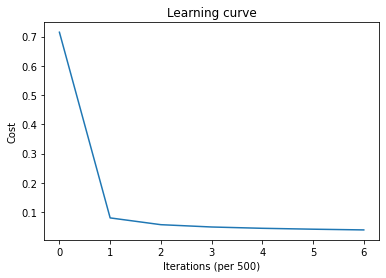

In [15]:
plt.plot(costs)
plt.xlabel('Iterations (per 500)')
plt.ylabel('Cost')
plt.title('Learning curve')
plt.show()

In [16]:
X_train.shape

(784, 12000)

In [17]:
y_train.shape

(1, 12000)

In [18]:
predictions_train = (forward_propagation(X_train, parameters)[0] > 0.5).astype(int)
predictions_test = (forward_propagation(X_test, parameters)[0] > 0.5).astype(int)


In [19]:
predictions_test.shape

(1, 2000)

In [35]:
training_accuracy = np.mean(predictions_train == y_train)
training_accuracy


0.9868333333333333

In [36]:
test_accuracy = np.mean(predictions_test == y_test)
test_accuracy

0.9815

In [20]:
#Visualize a few images along with their predicted class and true class
X_test_intermediate = X_test.T
X_test_images = X_test_intermediate.reshape(2000,28,28, 1)
X_test_images = np.squeeze(X_test_images)
X_test_images.shape

(2000, 28, 28)

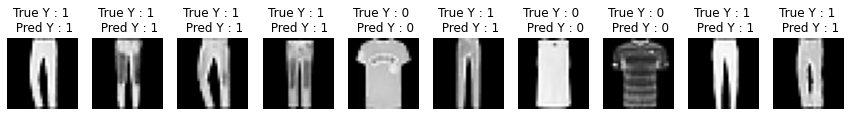

In [26]:
num_images = 10
fig, axes = plt.subplots(1, num_images, figsize = (15,15))

for i in range(num_images):
    ax  = axes[i]
    ax.imshow(X_test_images[i], cmap = "gray")
    ax.set_title(f"True Y : {y_test[0, i]} \n Pred Y : {predictions_test[0, i]}")
    ax.axis("off")

plt.show()

In [25]:
#Let us look at some of the incorrect examples
incorrect_indices = np.where(predictions_test[0] != y_test[0])[0]
incorrect_indices

array([ 112,  140,  213,  231,  249,  268,  297,  330,  341,  478,  496,
        551,  552,  598,  707, 1204, 1239, 1312, 1579, 1692, 1726, 1789,
       1801, 1873, 1877, 1882, 1920, 1940, 1971], dtype=int64)

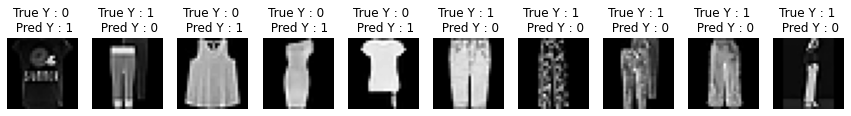

In [29]:
num_images = 10
fig, axes = plt.subplots(1, num_images, figsize = (15,15))

for i in range(num_images):
    idx = incorrect_indices[i]
    ax = axes[i]
    ax.imshow(X_test_images[idx], cmap = "gray")
    ax.set_title(f"True Y : {y_test[0, idx]} \n Pred Y : {predictions_test[0, idx]}")
    ax.axis("off")

plt.show()